In [6]:
import pandas as pd
import selenium
import numpy as np
pd.set_option("display.max_columns", 100)
pd.set_option("display.max_rows", 100)

In [2]:
df = pd.read_csv('NYPD_Complaint_Data_Historic.csv')
# df = df[(df['OFNS_DESC'] == 'ROBBERY') | (df['OFNS_DESC'] == 'BURGLARY')]

/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (18,20) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
df.head()

,CMPLNT_NUM,CMPLNT_FR_DT,CMPLNT_FR_TM,CMPLNT_TO_DT,CMPLNT_TO_TM,ADDR_PCT_CD,RPT_DT,KY_CD,OFNS_DESC,PD_CD,...,SUSP_SEX,TRANSIT_DISTRICT,Latitude,Longitude,Lat_Lon,PATROL_BORO,STATION_NAME,VIC_AGE_GROUP,VIC_RACE,VIC_SEX
0,536764362,06/01/2009,19:42:00,06/01/2009,19:43:00,25.0,06/09/2009,351,CRIMINAL MISCHIEF & RELATED OF,259.0,...,NaN,NaN,40.799622,-73.941872,"(40.79962153, -73.941872335)",PATROL BORO MAN NORTH,NaN,NaN,UNKNOWN,D
1,391832903,06/01/2009,18:00:00,06/09/2009,00:30:00,123.0,06/09/2009,365,ADMINISTRATIVE CODE,878.0,...,M,NaN,40.537226,-74.230616,"(40.537226396, -74.230615874)",PATROL BORO STATEN ISLAND,NaN,18-24,WHITE,F
2,362529055,06/01/2009,18:00:00,06/09/2009,10:00:00,109.0,06/09/2009,109,GRAND LARCENY,438.0,...,NaN,NaN,40.762929,-73.807415,"(40.76292907, -73.807415255)",PATROL BORO QUEENS NORTH,NaN,25-44,WHITE,M
3,933294043,06/01/2009,15:30:00,06/01/2009,15:45:00,9.0,06/09/2009,344,ASSAULT 3 & RELATED OFFENSES,101.0,...,F,NaN,40.719465,-73.977372,"(40.719465473, -73.977371562)",PATROL BORO MAN SOUTH,NaN,<18,WHITE HISPANIC,F
4,176306023,06/01/2009,15:00:00,06/08/2009,15:00:00,52.0,06/09/2009,361,OFF. AGNST PUB ORD SENSBLTY &,639.0,...,M,NaN,40.878106,-73.880984,"(40.878106453, -73.880984276)",PATROL BORO BRONX,NaN,18-24,WHITE HISPANIC,F


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6500870 entries, 0 to 6500869
Data columns (total 35 columns):
CMPLNT_NUM           int64
CMPLNT_FR_DT         object
CMPLNT_FR_TM         object
CMPLNT_TO_DT         object
CMPLNT_TO_TM         object
ADDR_PCT_CD          float64
RPT_DT               object
KY_CD                int64
OFNS_DESC            object
PD_CD                float64
PD_DESC              object
CRM_ATPT_CPTD_CD     object
LAW_CAT_CD           object
BORO_NM              object
LOC_OF_OCCUR_DESC    object
PREM_TYP_DESC        object
JURIS_DESC           object
JURISDICTION_CODE    float64
PARKS_NM             object
HADEVELOPT           object
HOUSING_PSA          object
X_COORD_CD           float64
Y_COORD_CD           float64
SUSP_AGE_GROUP       object
SUSP_RACE            object
SUSP_SEX             object
TRANSIT_DISTRICT     float64
Latitude             float64
Longitude            float64
Lat_Lon              object
PATROL_BORO          object
STATION_NAME 

In [6]:
df.shape

(6500870, 35)

In [7]:
df.isnull().sum()

CMPLNT_NUM                 0
CMPLNT_FR_DT             655
CMPLNT_FR_TM              48
CMPLNT_TO_DT         1607101
CMPLNT_TO_TM         1602801
ADDR_PCT_CD             2166
RPT_DT                     0
KY_CD                      0
OFNS_DESC              18805
PD_CD                   5496
PD_DESC                 5496
CRM_ATPT_CPTD_CD           7
LAW_CAT_CD                 0
BORO_NM                10518
LOC_OF_OCCUR_DESC    1394809
PREM_TYP_DESC          37703
JURIS_DESC                 0
JURISDICTION_CODE       5496
PARKS_NM             6479911
HADEVELOPT           6177206
HOUSING_PSA          5998248
X_COORD_CD             17339
Y_COORD_CD             17339
SUSP_AGE_GROUP       4590963
SUSP_RACE            3222422
SUSP_SEX             3355736
TRANSIT_DISTRICT     6356760
Latitude               17339
Longitude              17339
Lat_Lon                17339
PATROL_BORO             5953
STATION_NAME         6356760
VIC_AGE_GROUP        1638441
VIC_RACE                 305
VIC_SEX       

In [8]:
df.dropna(subset=['CMPLNT_FR_DT'], inplace=True)

In [9]:
df.OFNS_DESC.value_counts()

PETIT LARCENY                           1072666
HARRASSMENT 2                            806558
ASSAULT 3 & RELATED OFFENSES             677679
CRIMINAL MISCHIEF & RELATED OF           650406
GRAND LARCENY                            560174
DANGEROUS DRUGS                          405396
OFF. AGNST PUB ORD SENSBLTY &            348177
FELONY ASSAULT                           244857
ROBBERY                                  239963
BURGLARY                                 228031
MISCELLANEOUS PENAL LAW                  158740
DANGEROUS WEAPONS                        150256
OFFENSES AGAINST PUBLIC ADMINI           124374
GRAND LARCENY OF MOTOR VEHICLE           119353
INTOXICATED & IMPAIRED DRIVING            89633
VEHICLE AND TRAFFIC LAWS                  78713
CRIMINAL TRESPASS                         76953
SEX CRIMES                                75331
THEFT-FRAUD                               70110
FORGERY                                   65791
FRAUDS                                  

In [15]:
crimes_wanted = [
    'PETIT LARCENY', 'GRAND LARCENY', 'ROBBERY',
    'BURGLARY', 'DANGEROUS WEAPONS',
    'GRAND LARCENY OF MOTOR VEHICLE'
]

In [16]:
df_crimes = df.loc[df['OFNS_DESC'].isin(crimes_wanted)]

In [17]:
df_crimes.OFNS_DESC.value_counts()

PETIT LARCENY                     1072666
GRAND LARCENY                      560174
ROBBERY                            239963
BURGLARY                           228031
DANGEROUS WEAPONS                  150256
GRAND LARCENY OF MOTOR VEHICLE     119353
Name: OFNS_DESC, dtype: int64

In [18]:
df_crimes['CMPLNT_FR_DT'] = pd.to_datetime(
    df_crimes['CMPLNT_FR_DT'], errors='coerce', infer_datetime_format = True)

df_date_index = df_crimes.copy()

df_date_index.set_index('CMPLNT_FR_DT', inplace = True)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [19]:
df_date_index.head()

,CMPLNT_NUM,CMPLNT_FR_TM,CMPLNT_TO_DT,CMPLNT_TO_TM,ADDR_PCT_CD,RPT_DT,KY_CD,OFNS_DESC,PD_CD,PD_DESC,CRM_ATPT_CPTD_CD,LAW_CAT_CD,BORO_NM,LOC_OF_OCCUR_DESC,PREM_TYP_DESC,JURIS_DESC,JURISDICTION_CODE,PARKS_NM,HADEVELOPT,HOUSING_PSA,X_COORD_CD,Y_COORD_CD,SUSP_AGE_GROUP,SUSP_RACE,SUSP_SEX,TRANSIT_DISTRICT,Latitude,Longitude,Lat_Lon,PATROL_BORO,STATION_NAME,VIC_AGE_GROUP,VIC_RACE,VIC_SEX
CMPLNT_FR_DT,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2009-06-01,362529055,18:00:00,06/09/2009,10:00:00,109.0,06/09/2009,109,GRAND LARCENY,438.0,"LARCENY,GRAND FROM BUILDING (NON-RESIDENCE) UN...",COMPLETED,FELONY,QUEENS,INSIDE,RESIDENCE - APT. HOUSE,N.Y. POLICE DEPT,0.0,NaN,NaN,NaN,1037600.0,217288.0,NaN,NaN,NaN,NaN,40.762929,-73.807415,"(40.76292907, -73.807415255)",PATROL BORO QUEENS NORTH,NaN,25-44,WHITE,M
2009-06-01,653402720,14:00:00,NaN,NaN,52.0,06/09/2009,105,ROBBERY,397.0,"ROBBERY,OPEN AREA UNCLASSIFIED",COMPLETED,FELONY,BRONX,NaN,STREET,N.Y. POLICE DEPT,0.0,NaN,NaN,NaN,1017542.0,255919.0,NaN,UNKNOWN,NaN,NaN,40.869059,-73.879630,"(40.869058532, -73.879630148)",PATROL BORO BRONX,NaN,45-64,AMERICAN INDIAN/ALASKAN NATIVE,F
2009-06-01,962007813,13:30:00,NaN,NaN,88.0,06/09/2009,341,PETIT LARCENY,338.0,"LARCENY,PETIT FROM BUILDING,UN",COMPLETED,MISDEMEANOR,BROOKLYN,INSIDE,HOSPITAL,N.Y. POLICE DEPT,0.0,NaN,NaN,NaN,990485.0,190586.0,NaN,NaN,NaN,NaN,40.689797,-73.977519,"(40.689797334, -73.977518653)",PATROL BORO BKLYN NORTH,NaN,NaN,UNKNOWN,D
2009-06-01,799453803,12:00:00,NaN,NaN,114.0,06/09/2009,341,PETIT LARCENY,303.0,"LARCENY,PETIT BY CHECK USE",COMPLETED,MISDEMEANOR,QUEENS,INSIDE,RESIDENCE - APT. HOUSE,N.Y. POLICE DEPT,0.0,NaN,NaN,NaN,1003242.0,221309.0,NaN,NaN,NaN,NaN,40.774106,-73.931431,"(40.774106235, -73.931431472)",PATROL BORO QUEENS NORTH,NaN,45-64,BLACK,M
2009-06-01,596473983,09:30:00,06/01/2009,14:15:00,108.0,06/09/2009,341,PETIT LARCENY,335.0,"LARCENY,PETIT FROM TRUCK",COMPLETED,MISDEMEANOR,QUEENS,INSIDE,GAS STATION,N.Y. POLICE DEPT,0.0,NaN,NaN,NaN,1004071.0,210390.0,NaN,UNKNOWN,NaN,NaN,40.744135,-73.928471,"(40.744134559, -73.928470587)",PATROL BORO QUEENS NORTH,NaN,25-44,WHITE,F


In [37]:
month_count.head()

,Count
CMPLNT_FR_DT,
2006-01-01,16392
2006-02-01,13101
2006-03-01,15572
2006-04-01,15123
2006-05-01,16679


In [29]:
df_monthly = df_date_index.resample('MS')

month_count = df_monthly.size()
month_count = pd.DataFrame(month_count)
month_count.rename(columns={0: "Count"}, inplace = True)
month_count = month_count.loc['2006':]

In [21]:
month_count.to_csv('monthly_count.csv')

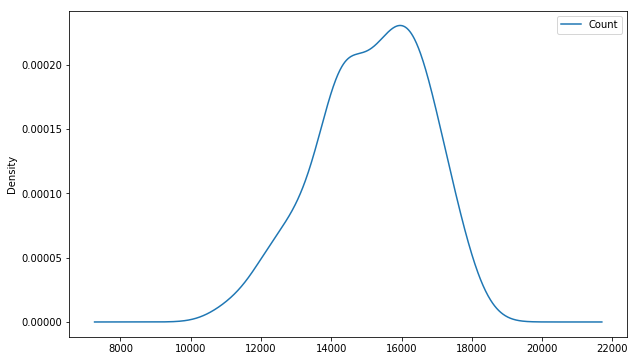

In [27]:
month_count.plot(kind ='kde', figsize=(10,6))

In [23]:
url = 'https://www.bls.gov/regions/new-york-new-jersey/data/xg-tables/ro2xglausnyc.htm'
unemployed = pd.read_html(url)

In [24]:
unemployed[3].head()

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Avg
0,2009,7.6,8.1,8.5,8.9,9.2,9.5,9.7,9.9,10.0,10.1,10.1,10.1,NaN
1,2010,10.1,10.0,9.9,9.8,9.6,9.5,9.4,9.3,9.3,9.2,9.2,9.1,NaN
2,2011,8.9,8.9,8.8,8.8,8.9,9.0,9.1,9.2,9.3,9.4,9.5,9.5,NaN
3,2012,9.6,9.6,9.6,9.6,9.6,9.5,9.4,9.2,9.1,9.1,9.0,9.0,NaN
4,2013,9.0,9.0,9.0,8.9,8.9,8.9,9.0,8.9,8.8,8.7,8.5,8.3,NaN


In [25]:
unemployed[7].T

,0,1,2,3,4,5,6,7,8,9,10,11,12
Year,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,Footnotes (1) Reflects revised population con...,Source: U.S. Bureau of Labor Statistics (BLS).
Jan,7.9,10.5,9.4,10.0,9.9,(1)8.3,(1)6.9,(1)5.6,(1)5.1,(1)4.6,4.9,Footnotes (1) Reflects revised population con...,Source: U.S. Bureau of Labor Statistics (BLS).
Feb,8.6,10.3,9.2,10.1,9.4,(1)8.4,(1)6.6,(1)5.5,(1)5.0,(1)4.6,4.6,Footnotes (1) Reflects revised population con...,Source: U.S. Bureau of Labor Statistics (BLS).
Mar,8.7,10.0,8.6,9.6,8.7,(1)8.1,(1)6.0,(1)5.4,(1)4.5,(1)4.3,4.2,Footnotes (1) Reflects revised population con...,Source: U.S. Bureau of Labor Statistics (BLS).
Apr,8.3,9.5,8.3,8.8,8.2,(1)7.0,(1)5.7,(1)4.9,(1)4.2,(1)3.9,(p)3.7,Footnotes (1) Reflects revised population con...,Source: U.S. Bureau of Labor Statistics (BLS).
May,8.9,9.2,8.5,9.2,8.6,(1)7.3,(1)5.8,(1)4.6,(1)4.4,(1)3.6,NaN,Footnotes (1) Reflects revised population con...,Source: U.S. Bureau of Labor Statistics (BLS).
Jun,9.5,9.4,9.1,9.7,9.1,(1)7.2,(1)5.6,(1)5.2,(1)4.6,(1)4.2,NaN,Footnotes (1) Reflects revised population con...,Source: U.S. Bureau of Labor Statistics (BLS).
Jul,9.9,9.7,9.3,9.9,9.2,(1)7.6,(1)5.8,(1)5.6,(1)5.1,(1)4.4,NaN,Footnotes (1) Reflects revised population con...,Source: U.S. Bureau of Labor Statistics (BLS).
Aug,10.0,9.5,9.3,9.4,9.1,(1)7.3,(1)5.5,(1)5.6,(1)5.2,(1)4.3,NaN,Footnotes (1) Reflects revised population con...,Source: U.S. Bureau of Labor Statistics (BLS).
Sep,10.0,9.2,9.2,8.7,8.7,(1)6.6,(1)5.0,(1)5.4,(1)4.6,(1)3.8,NaN,Footnotes (1) Reflects revised population con...,Source: U.S. Bureau of Labor Statistics (BLS).


In [28]:
url2 = 'https://labor.ny.gov/stats/laus.asp'
nyc_unemployed = pd.read_html(url2)

URLError: <urlopen error [Errno 0] Error>

In [ ]:
driver = selenium.

In [ ]:
selenium.

In [2]:
from selenium import webdriver

In [3]:
options = webdriver.ChromeOptions()
options.add_argument("/Users/menachikorn/Library/Application Support/Google/Chrome/Default")
driver = webdriver.Chrome(
    executable_path='/Users/menachikorn/Programming/chromedriver_mac64/chromedriver',
    chrome_options=options)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: use options instead of chrome_options
  """


In [4]:
driver.get('https://labor.ny.gov/stats/laus.asp')

In [5]:
path = ('//*[@id="ux-page"]/div/div[2]')
text = driver.find_element_by_xpath(path)
text = text.text

In [6]:
splited = text.split('\n')

In [7]:
unemployed = []
for i in range(24,11,-1):
    almost_ready = splited[i].split('%')
    almost_ready.pop()
    ready = almost_ready[0].split(' ') + almost_ready[1:-1]
    unemployed.append(ready)

In [8]:
np.array(unemployed)

array([['2006', '5.1', ' 5.3', ' 5.0', ' 4.6', ' 4.5', ' 4.5', ' 4.8',
        ' 4.4', ' 4.2', ' 3.9', ' 4.1', ' 4.0'],
       ['2007', '5.0', ' 4.9', ' 4.4', ' 4.2', ' 4.2', ' 4.5', ' 4.9',
        ' 4.5', ' 4.5', ' 4.4', ' 4.4', ' 4.8'],
       ['2008', '5.5', ' 5.4', ' 5.2', ' 4.6', ' 4.9', ' 5.1', ' 5.4',
        ' 5.5', ' 5.5', ' 5.6', ' 5.9', ' 6.5'],
       ['2009', '7.8', ' 8.3', ' 8.2', ' 7.7', ' 8.0', ' 8.4', ' 8.5',
        ' 8.5', ' 8.6', ' 8.7', ' 8.5', ' 8.8'],
       ['2010', '9.6', ' 9.5', ' 9.1', ' 8.5', ' 8.2', ' 8.4', ' 8.6',
        ' 8.4', ' 8.2', ' 8.2', ' 8.4', ' 8.2'],
       ['2011', '9.0', ' 8.8', ' 8.2', ' 7.8', ' 7.8', ' 8.2', ' 8.4',
        ' 8.2', ' 8.3', ' 8.2', ' 8.2', ' 8.4'],
       ['2012', '9.2', ' 9.4', ' 8.9', ' 8.2', ' 8.4', ' 8.7', ' 8.9',
        ' 8.5', ' 8.0', ' 8.0', ' 7.8', ' 8.1'],
       ['2013', '9.1', ' 8.7', ' 8.0', ' 7.4', ' 7.5', ' 7.9', ' 7.9',
        ' 7.7', ' 7.4', ' 7.4', ' 7.0', ' 6.7'],
       ['2014', '7.4', ' 7.6', ' 7.1', '

In [9]:
unemployed_df = pd.DataFrame(np.array(unemployed).reshape(13,13))

In [10]:
unemployed_df.rename({0: 'year'}, axis=1, inplace=True)

In [11]:
unemployed_df

,year,1,2,3,4,5,6,7,8,9,10,11,12
0,2006,5.1,5.3,5.0,4.6,4.5,4.5,4.8,4.4,4.2,3.9,4.1,4.0
1,2007,5.0,4.9,4.4,4.2,4.2,4.5,4.9,4.5,4.5,4.4,4.4,4.8
2,2008,5.5,5.4,5.2,4.6,4.9,5.1,5.4,5.5,5.5,5.6,5.9,6.5
3,2009,7.8,8.3,8.2,7.7,8.0,8.4,8.5,8.5,8.6,8.7,8.5,8.8
4,2010,9.6,9.5,9.1,8.5,8.2,8.4,8.6,8.4,8.2,8.2,8.4,8.2
5,2011,9.0,8.8,8.2,7.8,7.8,8.2,8.4,8.2,8.3,8.2,8.2,8.4
6,2012,9.2,9.4,8.9,8.2,8.4,8.7,8.9,8.5,8.0,8.0,7.8,8.1
7,2013,9.1,8.7,8.0,7.4,7.5,7.9,7.9,7.7,7.4,7.4,7.0,6.7
8,2014,7.4,7.6,7.1,6.0,6.2,6.2,6.5,6.3,5.8,5.6,5.7,5.5
9,2015,6.4,6.2,5.6,5.2,5.3,5.2,5.4,5.0,4.7,4.7,4.7,4.7
